In [1]:
import numpy as np
import pandas as pd 
from PIL import Image 

In [2]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

df.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

df.columns = list(map(str, df.columns))

df.set_index('Country', inplace = True)

df['Total'] =  df.sum(axis = 1)

years = list(map(str, range(1980, 2014)))

In [7]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

### Waffle charts

In [12]:
df_1 = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_1

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [17]:
total_values = sum(df_1['Total'])
category_proportions = [(float(value) / total_values) for value in df_1['Total']]
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [18]:
for i, proportion in enumerate(category_proportions):
    print(df_1.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [19]:
width = 40 
height = 10 
total_num_tiles = width * height
print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [22]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
tiles_per_category

[129, 77, 194]

In [24]:
for i, tiles in enumerate(tiles_per_category):
    print (df_1.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [29]:
waffle_chart = np.zeros((height, width))
waffle_chart

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [28]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

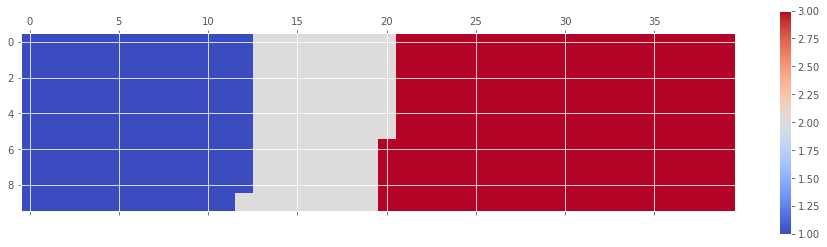

In [33]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

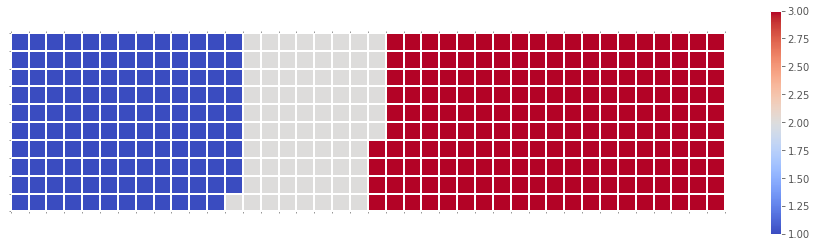

In [35]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

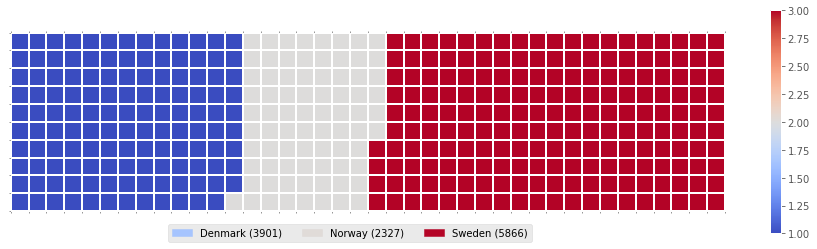

In [39]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_1['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]


legend_handles = []
for i, category in enumerate(df_1.index.values):
    label_str = category + ' (' + str(df_1['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))


plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_1.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [42]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    df_dsn = df_1
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    total_num_tiles = width * height 
    print ('Total number of tiles is', total_num_tiles)
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1       
            
            waffle_chart[row, col] = category_index
    
    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 500
Denmark: 161
Norway: 96
Sweden: 243


<Figure size 432x288 with 0 Axes>

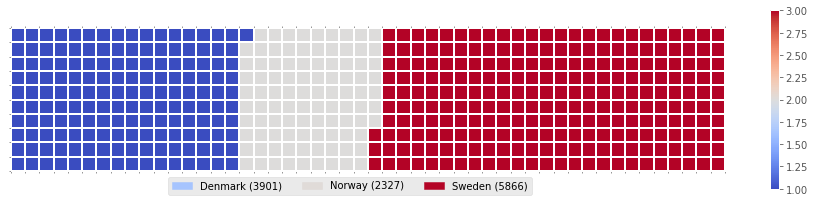

In [47]:
width = 50
height = 10 

categories = df_1.index.values 
values = df_1['Total']

colormap = plt.cm.coolwarm
create_waffle_chart(categories, values, height, width, colormap)

### WordClouds

In [49]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [56]:
alice_novel = open('alice_novel.txt', 'r').read()

print(alice_novel)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [59]:
stopwords = set(STOPWORDS)
print(stopwords)

{'why', "isn't", 'there', "they've", 'above', 'could', 'hence', 'into', 'once', 'an', 'own', 'www', "i'm", 'also', 'theirs', 'its', 'shall', 'ought', "you'd", 'this', 'over', 'would', 'here', 'our', 'ourselves', 'too', 'having', 'are', "haven't", 'other', 'out', 'through', 'in', 'should', 'each', 'under', 'since', "doesn't", "don't", 'at', 'k', 'yourself', 'how', 'do', "mustn't", "you'll", "wouldn't", 'most', 'has', "you're", 'some', "we've", 'from', 'he', 'me', 'being', 'then', "shan't", 'just', 'been', 'be', 'only', 'to', "weren't", 'when', 'a', 'up', 'during', 'itself', "when's", 'further', 'we', 'am', "here's", 'otherwise', 'they', 'else', "can't", "she'll", "why's", 'can', 'get', 'because', 'between', "they'd", 'more', "they'll", "i'd", 'until', "she's", 'down', 'so', 'him', "there's", 'with', 'about', "he's", 'like', "hasn't", 'have', 'again', 'of', 'she', 'very', 'yours', 'who', 'cannot', "that's", 'by', 'had', "wasn't", 'it', 'yourselves', "didn't", "couldn't", 'his', 'both', '

In [61]:
alice_wc = WordCloud(background_color = "white", stopwords = stopwords, max_words = 2000)
alice_wc.generate(alice_novel)

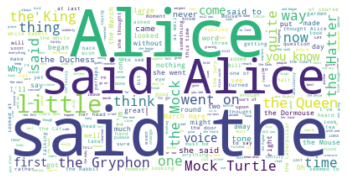

In [66]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

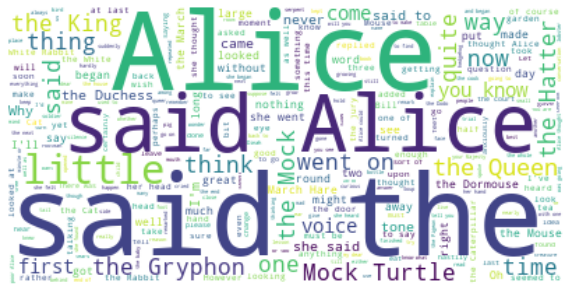

In [68]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(12)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
alice_mask = np.array(Image.open('alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

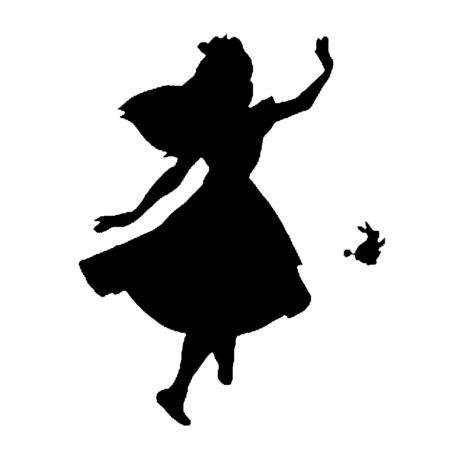

In [73]:
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(8)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

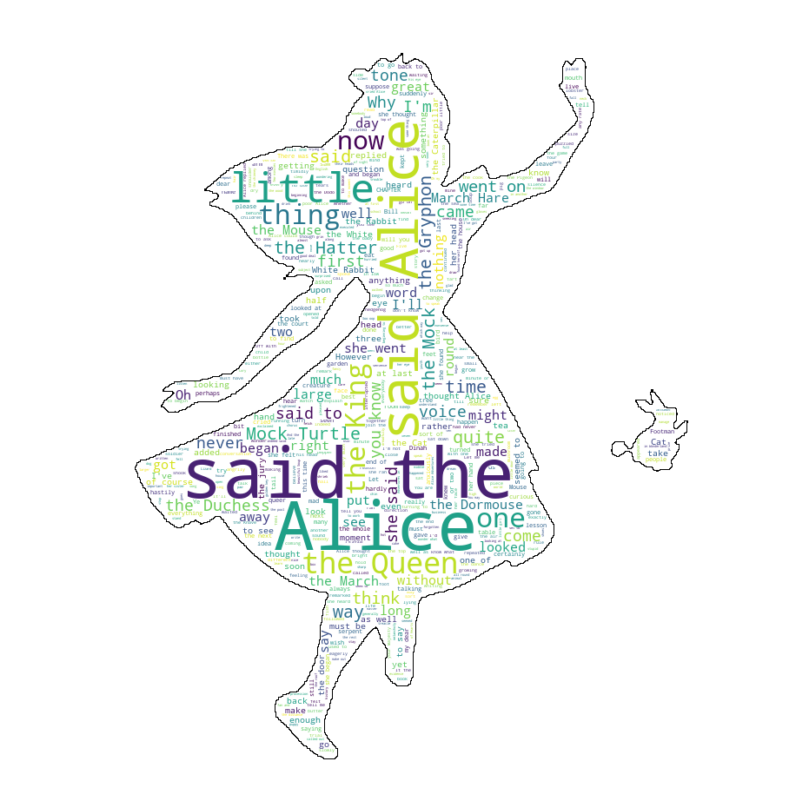

In [77]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords, 
                     contour_width=1, contour_color='black')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regplots

In [78]:
import seaborn as sns

df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


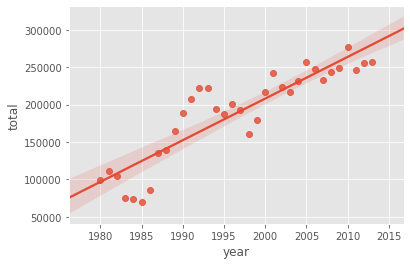

In [79]:
sns.regplot(x="year", y = "total", data = df_tot)

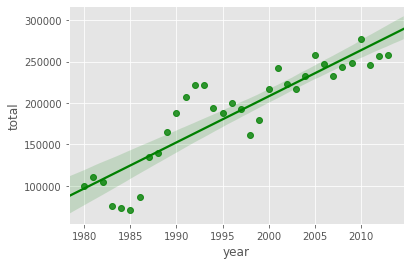

In [80]:
sns.regplot(x="year", y = "total", data = df_tot, color = "green")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

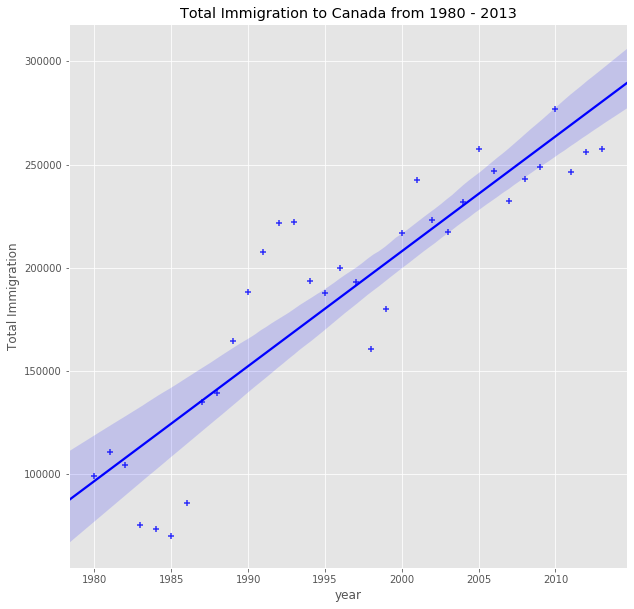

In [82]:
plt.figure(figsize = (10, 10))
ax = sns.regplot(x="year", y = "total", data = df_tot, color = "blue", marker = "+")
ax.set(xlabel = "year", ylabel = 'Total Immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

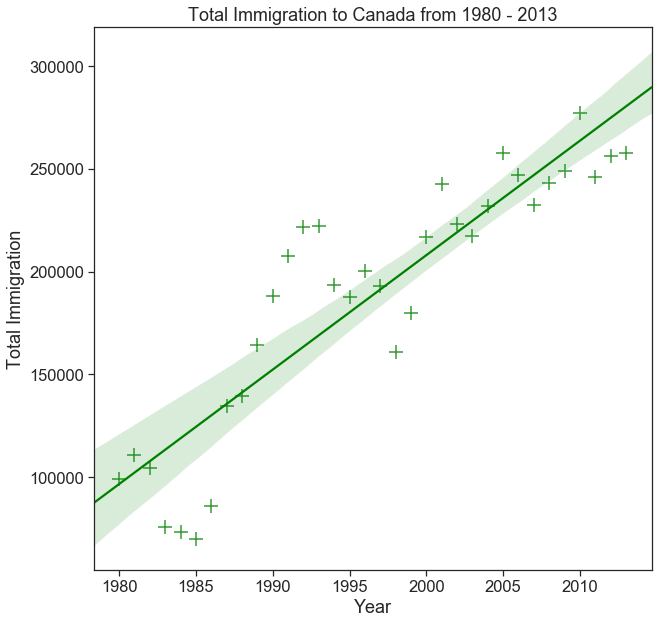

In [92]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

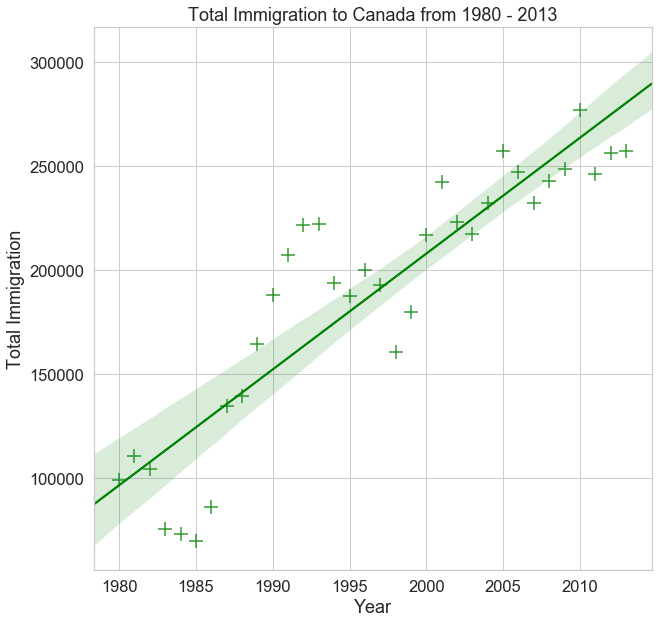

In [93]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')